In [1]:
%matplotlib inline
import pandas as pd

In [2]:
'''from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))'''

In [2]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [5]:
titles['title'].value_counts().head(10)

Hamlet                  19
Carmen                  14
Macbeth                 14
The Three Musketeers    12
Maya                    11
Surrender               10
She                     10
Love                    10
Honeymoon               10
Othello                 10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [6]:
titles[(titles.year <= 1939) & (titles.year >= 1930)].year.value_counts().head(3)

1937    1189
1936    1131
1938    1116
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

In [7]:
decades = titles.year // 10 *10
decades.value_counts()

2010    56983
2000    38024
1990    21629
1980    19474
1970    17931
1960    16792
1950    12175
1930     9991
1920     8682
1940     8352
1910     6389
2020       74
1900       36
1890        4
Name: year, dtype: int64

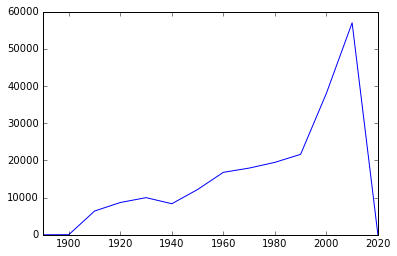

In [8]:
decades.value_counts().sort_index().plot()

### Plot the number of "Hamlet" films made each decade.

In [9]:
hamlets = titles[titles.title.str.startswith("Hamlet")]
decades = hamlets.year // 10 * 10

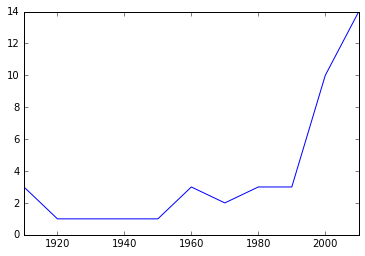

In [10]:
decades.value_counts().sort_index().plot()

### Plot the number of "Rustler" characters in each decade of the history of film.

In [11]:
rustlers = cast[cast.character == "Rustler"]
rdecades = rustlers.year // 10 * 10

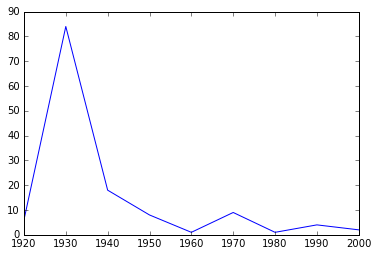

In [12]:
rdecades.value_counts().sort_index().plot()

### Plot the number of "Hamlet" characters each decade.

In [14]:
hamletchars = cast[cast.character.str.startswith("Hamlet")]
hamyears = hamletchars.year // 10 * 10

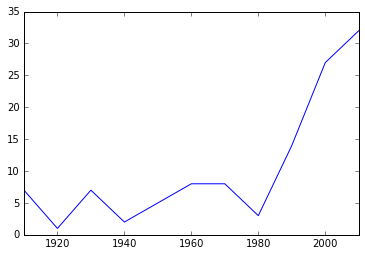

In [15]:
hamyears.value_counts().sort_index().plot()

### What are the 11 most common character names in movie history?

In [21]:
cast['character'].value_counts().sort_values().tail(11)

Minor Role      6024
Party Guest     6175
Bartender       6254
Nurse           6275
Policeman       6573
Student         6616
Doctor          6993
Reporter        7749
Extra           9464
Dancer         11281
Himself        18766
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [24]:
herselves = cast[cast.character == 'Herself']
herselves

,title,year,name,type,character,n
19545,Noel Gallagher's High Flying Birds Live,2012,Eugenie Aichison,actor,Herself,22
106006,Alexander Jamieson,2015,Etta Baker,actor,Herself,NaN
179205,Le fils de Gascogne,1995,Ren? Biaggi,actor,Herself,22
187210,30 Years of Dark Seduction,2015,Steve (II) Bishart,actor,Herself,NaN
190955,Forty Shades of Blue,2005,J. Blackfoot,actor,Herself,7
191274,Wienfilm 1896-1976,1976,Moucle Blackout,actor,Herself,NaN
208011,Not Another B Movie,2010,Babette Bombshell,actor,Herself,19
288639,Hell House,2009,Josette Bynum,actor,Herself,NaN
288640,The Legacy,2009,Josette Bynum,actor,Herself,NaN
372617,Wrongfully Accused,1998,Lamb Chop,actor,Herself,15


In [26]:
herselves['name'].value_counts().head(10)

Joyce Brothers         14
Queen Elizabeth II     11
Lili?n Garc?a           8
Margaret Thatcher       8
Joan Rivers             7
Mary Jo Pehl            7
Sally Jessy Raphael     5
Chris Evert             5
Marilyn Monroe          5
Caroline Rhea           5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [27]:
himselves = cast[cast.character == 'Himself']
himselves

,title,year,name,type,character,n
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
5,Townbiz,2010,Too $hort,actor,Himself,NaN
35,Been Down So Long It Looks Like Up to Me,1971,Murray the 'K',actor,Himself,NaN
36,I Wanna Hold Your Hand,1978,Murray the 'K',actor,Himself,47
82,Love Hollywood Style,2006,Mac 10,actor,Himself,NaN
86,Malibu Horror Story,2014,12th Planet,actor,Himself,NaN
111,Don't Shoot! I'm the Guitar Man,2015,Rappin' 4-Tay,actor,Himself,NaN
112,The Beat,2003,4-Zone,actor,Himself,NaN
115,Tha Eastsidaz,2000,40 Glocc,actor,Himself,NaN


In [28]:
himselves['name'].value_counts().head(10)

Adolf Hitler             94
Richard Nixon            41
Ronald Reagan            32
John F. Kennedy          25
Ron Jeremy               25
Bill Clinton             21
Franklin D. Roosevelt    20
George W. Bush           20
Winston Churchill        20
Martin Luther King       19
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [35]:
players = cast[cast.year == 1945]
players['name'].value_counts()

Emmett Vogan                 39
Sam (II) Harris              30
Harold Miller                29
Bess Flowers                 28
Nolan Leary                  27
Frank O'Connor               26
Franklyn Farnum              25
Pierre Watkin                24
Edmund Cobb                  24
Tom London                   24
Charles Sullivan             24
Herman Hack                  23
Horace B. Carpenter          23
Bud Osborne                  23
Addison Richards             23
Larry Steers                 23
Arthur Loft                  22
Budd Buster                  22
Byron Foulger                22
Jack Ingram                  22
Lee Phelps                   22
Chester Clute                22
Kenner G. Kemp               21
Al Ferguson                  21
Edward Gargan                21
Milton Kibbee                21
Rex Lease                    21
John (II) Tyrrell            20
Roy Bucko                    20
Jack O'Shea                  20
                             ..
Paul Hen

### Which actors or actresses appeared in the most movies in the year 1985?

In [37]:
players85 = cast[cast.year == 1985]
players85['name'].value_counts()

Shakti Kapoor                  19
Mammootty                      19
Sukumari                       17
Lou Scheimer                   15
Aruna Irani                    14
Raj Babbar                     13
Deven Verma                    13
Mohanlal                       13
Rajesh Khanna                  13
Satyendra Kapoor               12
Pinchoo Kapoor                 12
Jagdish Raj                    12
Om Shivpuri                    12
Asrani                         12
Thilakan                       11
Yunus Parvez                   10
Danny Denzongpa                10
Innocent Vareed Thekkethala    10
Sharat Saxena                  10
Kulbhushan Kharbanda           10
Rati Agnihotri                 10
Madan Puri                     10
Iftekhar                       10
Jagathi Sreekumar              10
Huma Khan                       9
Shobana                         9
Nedumudi Venu                   9
Smita Patil                     9
Vikas Anand                     9
Mithun Chakrab

### Plot how many roles Mammootty has played in each year of his career.

### What are the 10 most frequent roles that start with the phrase "Patron in"?

### What are the 10 most frequent roles that start with the word "Science"?

### Plot the n-values of the roles that Judi Dench has played over her career.

### Plot the n-values of Cary Grant's roles through his career.

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?